<B><Font color='Blue'/> <font size='3.5'/> Load the Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

<B><Font color='Blue'/> <font size='3.5'/> Load the dataset

In [2]:
bank=pd.read_csv("bank_marketing_part1_Data.csv")

<B><Font color='Blue'/> <font size='3.5'/> Head and Tail of the dataset

In [3]:
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.tail(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


<B><Font color='Blue'/> <font size='3.5'/> Shape of the Dataset

In [5]:
bank.shape

(210, 7)

In [6]:
print('Number of rows before discarding duplicates = %d' % (bank.shape[0]))
bank.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (bank.shape[0]))

Number of rows before discarding duplicates = 210
Number of rows after discarding duplicates = 210


<B><Font color='Blue'/> <font size='3.5'/> Description of the dataset

In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


<B><Font color='Blue'/> <font size='3.5'/> Checking for any null values or NAN values

In [8]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

<B><Font color='Blue'/> <font size='3.5'/> Type of dataset

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 13.1 KB


In [10]:
bank.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


<B/> <font color='Blue'/> <Font size='2.5'/> Multivariate Analysis

In [11]:
bank.corr(method='pearson')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


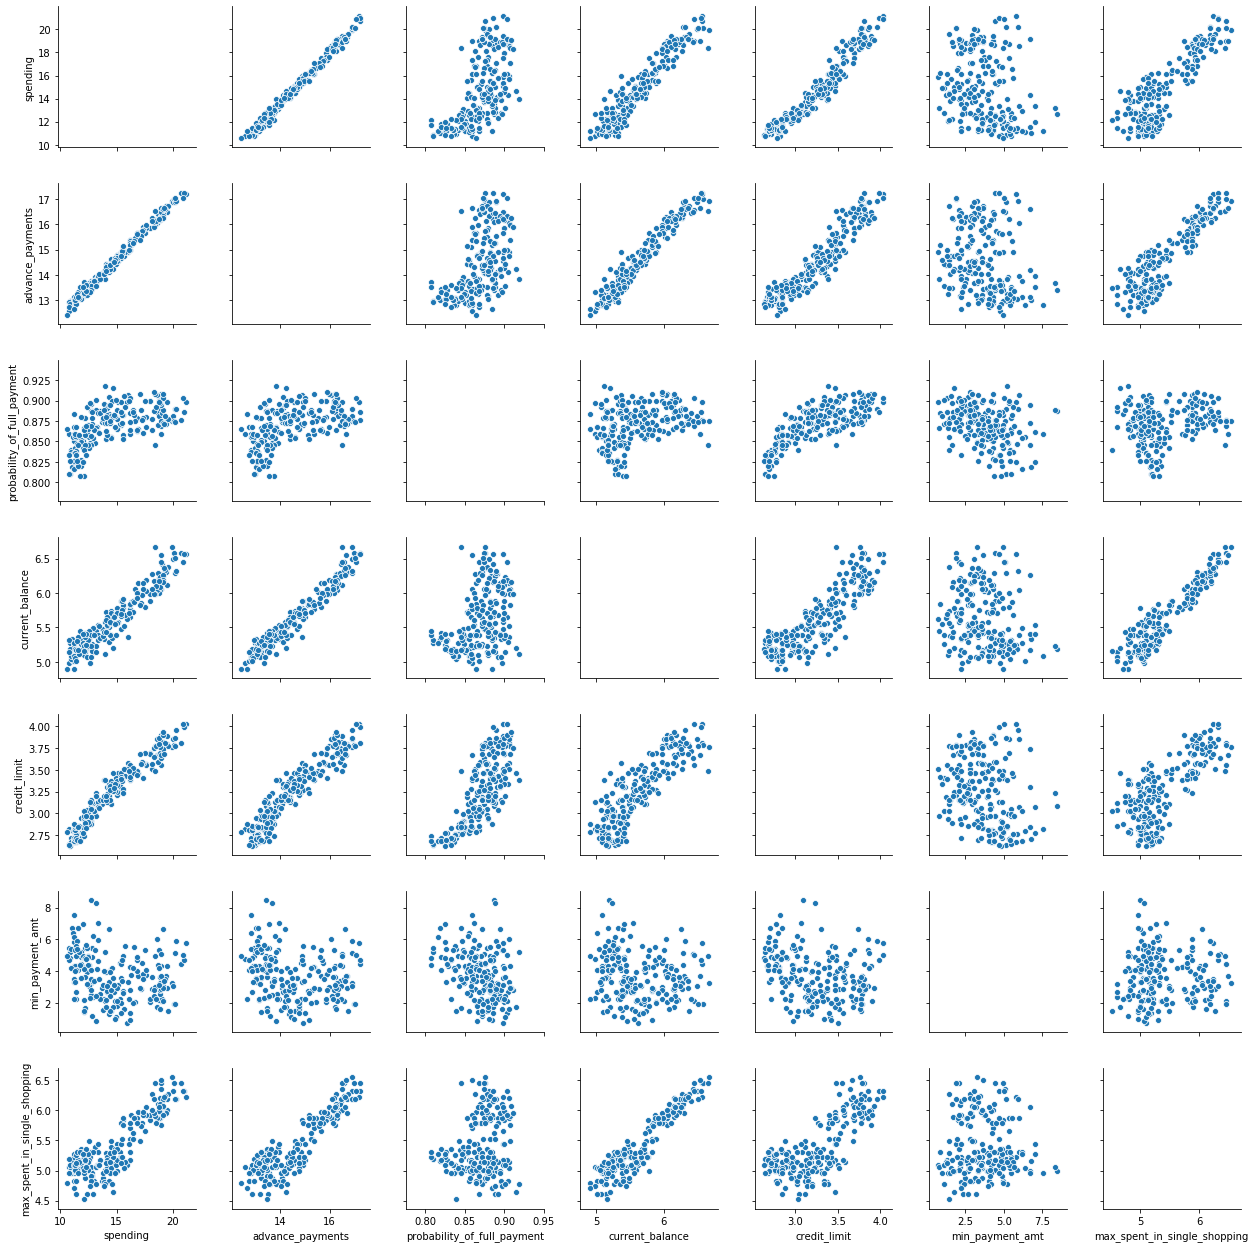

In [12]:
sns.pairplot(bank,diag_kind='scatter',height=2.5)

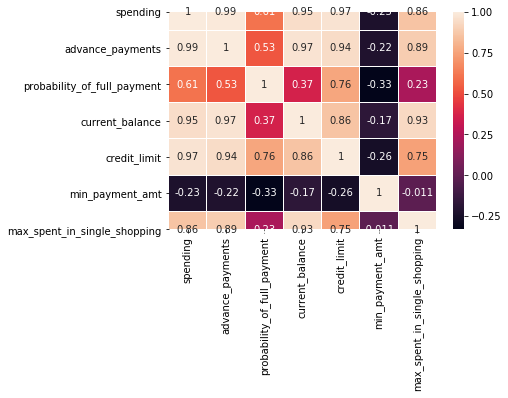

In [13]:
sns.heatmap(bank.corr(), annot=True,fmt='.2g',linewidths=0.1,
    linecolor='white')

<B><Font color='Blue'/> <font size='3.5'/> checking for any outliers in the dataset

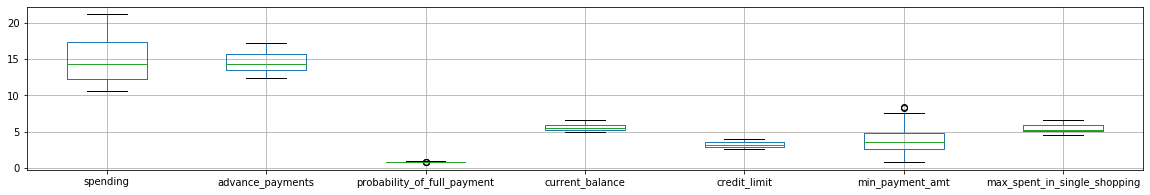

In [14]:
bank.boxplot(figsize=(20,3))

<I/> in the given dataset we could find there are only two outliers that need to be treated. 

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [16]:
lratio,uratio=remove_outlier(bank['probability_of_full_payment'])
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']>uratio,uratio,bank['probability_of_full_payment'])
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']<lratio,lratio,bank['probability_of_full_payment'])

lratio,uratio=remove_outlier(bank['min_payment_amt'])
bank['min_payment_amt']=np.where(bank['min_payment_amt']>uratio,uratio,bank['min_payment_amt'])
bank['min_payment_amt']=np.where(bank['min_payment_amt']<lratio,lratio,bank['min_payment_amt'])

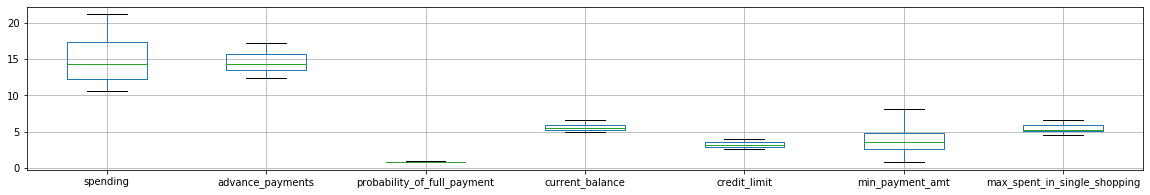

In [17]:
bank.boxplot(figsize=(20,3))

<B/> <Font Color='Green'/> <font size='2.5'/> 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X = StandardScaler()

In [20]:
scaled_df = X.fit_transform(bank)
scaled_df

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

Now we have scaled the dataset

In [21]:
scaled_df = pd.DataFrame(scaled_df, index=bank.index, columns=bank.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


<B/><Font color='green'/><font size='2.5'/>1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
HClust = linkage(scaled_df, method = 'ward')

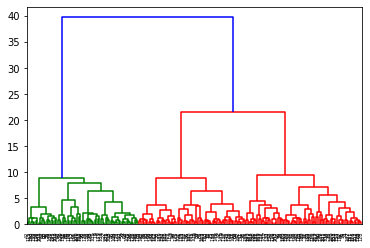

In [25]:
dend = dendrogram(HClust)

In [ ]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

<B/> <font color='Blue'/><font size='2.5'/>  Identify the number of optimum clusters using Dendrogram

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
# Method 1
clusters_1 = fcluster(HClust, 3, criterion='maxclust')
clusters_1

In [ ]:
# Method 2

clusters_2 = fcluster(HClust, 20, criterion='distance')
clusters_2

In [ ]:
np.array_equal(clusters_1,clusters_2)

In [ ]:
bank['H_clusters'] = clusters_1

In [ ]:
bank.head()

In [ ]:
bank.to_csv('H_Cluster.csv') # Exported the dataset

<B/><font color="Green"/><font size="2.5"/>1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [26]:
from sklearn.cluster import KMeans 

In [27]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
k_means3.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [28]:
k_means3.inertia_

430.2984817512229

In [29]:
k_means3.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
k_means4 = KMeans(n_clusters = 4)
k_means4.fit(scaled_df)
k_means4.labels_
k_means4.inertia_

371.092556037249

In [31]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_df)
k_means2.labels_
k_means2.inertia_

659.1474009548498

In [32]:
k_means5 = KMeans(n_clusters = 5)
k_means5.fit(scaled_df)
k_means5.labels_
k_means5.inertia_

326.10234664743155

In [33]:
wss =[]

In [34]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [35]:
wss

[1470.0,
 659.1474009548498,
 430.2984817512229,
 371.0356644664014,
 326.06187488248025,
 290.7634026923419,
 261.97595012053785,
 240.68364375717326,
 224.3898166609323,
 208.24421530383472]

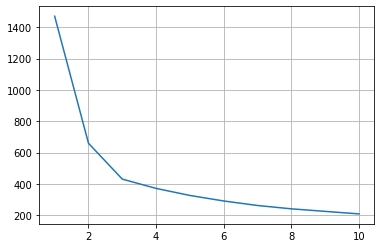

In [36]:
plt.plot(range(1,11), wss)
plt.grid()
plt.show()

In [37]:
k_means2 = KMeans(n_clusters = 2)
k_means2.fit(scaled_df)
k_means2.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [38]:
k_means3 = KMeans(n_clusters = 3)
k_means3.fit(scaled_df)
labels=k_means3.labels_
labels

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [39]:
bank["Clus_kmeans"] = labels
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [41]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [42]:
sil_width = silhouette_samples(scaled_df,labels)

In [43]:
bank["sil_width"] = sil_width
bank.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,0.360972


In [44]:
silhouette_samples(scaled_df,labels).min()

0.00276854112861622

<B/><font color="Green"/><font size="2.5"/> 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [45]:
bank.to_csv('sil_width.csv') 